<a href="https://colab.research.google.com/github/Skyism/mental-health-ML/blob/main/MachineLearningResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report
from sklearn import datasets, linear_model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

Mount the drive to read files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the file  into a dataframe that we call df

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('csvResearch.csv').sheet1

In [ ]:
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows)

In [ ]:
#creating columns name
df.columns = df.iloc[0]
df = df.iloc[1:]

In [ ]:
df.head()

,I consent to the consent forms (linked below)\nMinors: https://docs.google.com/document/d/14w6gp9QchbVqPDLv1psL1NjiErK1QITEKm_ZILVbOvU/edit?usp=sharing\nParental consent form:\nhttps://docs.google.com/document/d/1HsqcdTJtpVB8HqA9XQOMGX9iDxjjG9gf4zE7TLtf0ZQ/edit?usp=sharing\n,Sex,Grade,Classes,Sleep,Homework,Freetime,Work,Extracurricular,EnjoymentExtracurricular,...,Strictness,Friends,Relationship,Loneliness,Happiness,HappinessComparison,CharacterizationHappiness,CharacterizationDepression,Mental Health,SHC
1,Yes,Male,10,6,7,4,1,0,15,5,...,5,3,1,3,4,3,5,4,5,4
2,Yes,Female,12,4,6,3,6,0,11,5,...,5,5,6,3,5,5,4,5,5,4.75
3,Yes,Male,11,4,6,4,2,30,12,4,...,3,6,1,4,4,3,3,3,3,3.25
4,Yes,Male,9,0,5,1,7,0,0,1,...,3,3,1,1,1,1,1,2,1,1.25
5,Yes,Male,9,1,8,3,5,0,12,6,...,3,3,1,1,2,3,1,4,3,2.5


In [ ]:
df = df[df.Sex != 'Other']

In [ ]:
df.drop(columns=['I consent to the consent forms (linked below)\nMinors: https://docs.google.com/document/d/14w6gp9QchbVqPDLv1psL1NjiErK1QITEKm_ZILVbOvU/edit?usp=sharing\nParental consent form:\nhttps://docs.google.com/document/d/1HsqcdTJtpVB8HqA9XQOMGX9iDxjjG9gf4zE7TLtf0ZQ/edit?usp=sharing\n'])

,Sex,Grade,Classes,Sleep,Homework,Freetime,Work,Extracurricular,EnjoymentExtracurricular,Extraversion,...,Strictness,Friends,Relationship,Loneliness,Happiness,HappinessComparison,CharacterizationHappiness,CharacterizationDepression,Mental Health,SHC
1,Male,10,6,7,4,1,0,15,5,3,...,5,3,1,3,4,3,5,4,5,4
2,Female,12,4,6,3,6,0,11,5,3,...,5,5,6,3,5,5,4,5,5,4.75
3,Male,11,4,6,4,2,30,12,4,6,...,3,6,1,4,4,3,3,3,3,3.25
4,Male,9,0,5,1,7,0,0,1,1,...,3,3,1,1,1,1,1,2,1,1.25
5,Male,9,1,8,3,5,0,12,6,1,...,3,3,1,1,2,3,1,4,3,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Female,10,6,7,4,2,0,7,5,1,...,4,7,1,5,3,3,4,3,4,3.25
465,Female,11,4,6,2,1,0,20,7,6,...,2,4,1,2,7,7,5,3,4,5.5
466,Female,12,4,8,2,2,20,20,7,3,...,5,5,6,3,5,5,3,5,5,4.5
467,Female,11,4,6,8,4,4,2,4,4,...,4,4,4,4,3,4,3,4,4,3.5


In [ ]:
df['Sex'] = df['Sex'].replace(['Male','Female'],[0,1])

In [ ]:
df.drop(columns=['I consent to the consent forms (linked below)\nMinors: https://docs.google.com/document/d/14w6gp9QchbVqPDLv1psL1NjiErK1QITEKm_ZILVbOvU/edit?usp=sharing\nParental consent form:\nhttps://docs.google.com/document/d/1HsqcdTJtpVB8HqA9XQOMGX9iDxjjG9gf4zE7TLtf0ZQ/edit?usp=sharing\n','Happiness', 'HappinessComparison','CharacterizationHappiness','CharacterizationDepression','Mental Health'])

,Sex,Grade,Classes,Sleep,Homework,Freetime,Work,Extracurricular,EnjoymentExtracurricular,Extraversion,Family,Strictness,Friends,Relationship,Loneliness,SHC
1,0,10,6,7,4,1,0,15,5,3,4,5,3,1,3,4
2,1,12,4,6,3,6,0,11,5,3,4,5,5,6,3,4.75
3,0,11,4,6,4,2,30,12,4,6,4,3,6,1,4,3.25
4,0,9,0,5,1,7,0,0,1,1,2,3,3,1,1,1.25
5,0,9,1,8,3,5,0,12,6,1,2,3,3,1,1,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1,10,6,7,4,2,0,7,5,1,6,4,7,1,5,3.25
465,1,11,4,6,2,1,0,20,7,6,6,2,4,1,2,5.5
466,1,12,4,8,2,2,20,20,7,3,5,5,5,6,3,4.5
467,1,11,4,6,8,4,4,2,4,4,4,4,4,4,4,3.5


In [ ]:
X = df[['Sex', 'Grade','Classes','Sleep','Homework','Freetime','Work','Extracurricular','EnjoymentExtracurricular','Extraversion','Family','Strictness','Friends','Relationship','Loneliness']].values

In [ ]:
X[0,:]

array([0, '10', '6', '7', '4', '1', '0', '15', '5', '3', '4', '5', '3',
       '1', '3'], dtype=object)

In [ ]:
print(X[:5,:])

[[0 '10' '6' '7' '4' '1' '0' '15' '5' '3' '4' '5' '3' '1' '3']
 [1 '12' '4' '6' '3' '6' '0' '11' '5' '3' '4' '5' '5' '6' '3']
 [0 '11' '4' '6' '4' '2' '30' '12' '4' '6' '4' '3' '6' '1' '4']
 [0 '9' '0' '5' '1' '7' '0' '0' '1' '1' '2' '3' '3' '1' '1']
 [0 '9' '1' '8' '3' '5' '0' '12' '6' '1' '2' '3' '3' '1' '1']]


In [ ]:
X.shape

(464, 15)

In [ ]:
y = df['SHC'].values

In [ ]:
y

array(['4', '4.75', '3.25', '1.25', '2.5', '5', '2.25', '1.75', '5.25',
       '3', '4.75', '4.75', '4.25', '3.75', '2', '4', '2.25', '2.5',
       '4.25', '2', '4', '2.5', '1.5', '4.25', '5.5', '2.25', '2.25', '3',
       '3.75', '3.75', '3.75', '2.5', '3.25', '3.75', '3', '5.75', '1.5',
       '4.5', '1.75', '3.25', '3', '4.5', '4.75', '4.75', '3', '4.5',
       '2.25', '2.75', '1.25', '4.75', '4', '2.25', '2.5', '4.75', '6.25',
       '4.75', '3.5', '3.25', '5.5', '6', '2.25', '4.75', '4', '3.75',
       '6.25', '2.5', '2.75', '3.75', '5.25', '3', '4.25', '4', '3.5',
       '5', '3.75', '4.5', '3.75', '5', '3.25', '4', '7', '2.5', '2', '1',
       '4.75', '3.25', '5.5', '2.5', '4.25', '2', '5.75', '2.75', '5.25',
       '2.5', '3.5', '2.75', '5', '3.75', '3.5', '2.75', '4', '3', '2.75',
       '4.25', '1.25', '2.5', '3', '3.25', '3.5', '3.25', '1', '2.75',
       '5.25', '3.5', '3.5', '2', '5.25', '3.75', '3.25', '1.5', '3.5',
       '3', '5', '1.25', '4.5', '4.5', '4.5', '4', '3.75

In [ ]:
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

0
I consent to the consent forms (linked below)\nMinors: https://docs.google.com/document/d/14w6gp9QchbVqPDLv1psL1NjiErK1QITEKm_ZILVbOvU/edit?usp=sharing\nParental consent form:\nhttps://docs.google.com/document/d/1HsqcdTJtpVB8HqA9XQOMGX9iDxjjG9gf4zE7TLtf0ZQ/edit?usp=sharing\n    False
Sex                                                                                                                                                                                                                                                                                     True
Grade                                                                                                                                                                                                                                                                                   True
Classes                                                                                                                                        

In [ ]:
scaler = preprocessing.StandardScaler()

In [ ]:
y.shape
y=y.reshape(464,1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=4)

In [ ]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_val_scaled=scaler.transform(X_val)

Reshaping label

In [ ]:
scaler.fit(y)

StandardScaler()

In [ ]:
scaler.fit(y_train)

StandardScaler()

In [ ]:
y_train_scaled=scaler.transform(y_train)
y_val_scaled=scaler.transform(y_val)

In [ ]:
print(X_train_scaled.shape,X_val_scaled.shape,y_train_scaled.shape,y_val_scaled.shape)

(348, 15) (116, 15) (348, 1) (116, 1)


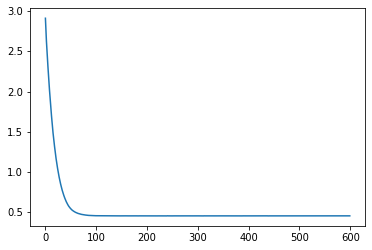

In [ ]:
# deletes model if it was created before
model = 0
# Create a neural network. Only the input layer
model = Sequential()
# Adds a layer with 1 node. This will be the output layer. It also sets the
# activation function of thus layer to be the sigmoid function
model.add(Dense(1))
# Tells what error will be minimized. Note: loss = error
model.compile(loss='MSE')
# Trains the model, epochs is the number of steps the algorith takes (beyond
# the scope of our course, verbose = 0 is so that it does not print stuff on the
# screen)
model.fit(X_train_scaled,y_train_scaled,epochs=600,verbose=0)
# creates a list with the value of the error after each step
J_list = model.history.history['loss']
# plots the error after each step
plt.plot(J_list)

In [ ]:
y_pred_prob = model.predict(X_train_scaled)

11/11 [==============================] - 0s 2ms/step


In [ ]:
y_pred_prob_inverse = scaler.inverse_transform(y_pred_prob)

In [ ]:
y_val_pred_prob = model.predict(X_val_scaled)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_val_pred_prob_inverse = scaler.inverse_transform(y_val_pred_prob)

In [ ]:
print(mean_squared_error(y_val_scaled, y_val_pred_prob))
print(r2_score(y_val_scaled, y_val_pred_prob))
print(mean_absolute_percentage_error(y_val_scaled, y_val_pred_prob))

0.8486354752383873
-0.001558084133535198
1.0025638211228816


In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression_y_pred = regr.predict(X_val)


In [ ]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, regression_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, regression_y_pred))


Coefficients: 
 [[-0.13181241  0.11027669 -0.04894603  0.10859711 -0.04289435 -0.01677899
  -0.00293058  0.01986782  0.07014935  0.22502978  0.10495828 -0.03222591
  -0.01586726  0.00259467  0.29859925]]
Mean squared error: 0.76
Coefficient of determination: 0.52
